# 14. AMES HOUSING: EXPLORATIVE DATA ANALYSIS
---

## 1. Introducing the Data
- We are going to work with the training dataset that we saved from the previous chapter
- Our Target Feature Is `SalePrice`

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
print(ames.shape)
ames.head()

(2344, 80)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,80.0,10400.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370.0,0.0,0.0,1370.0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2009,WD,Family,152000.0
1,60,RL,NaN,28698.0,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160.0,966.0,0.0,2126.0,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486.0,0.0,0.0,0.0,225.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Abnorml,185000.0
2,90,RL,70.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224.0,0.0,0.0,1224.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2007,WD,Normal,101800.0
3,90,RL,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040.0,0.0,0.0,1040.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Normal,90000.0
4,190,RM,63.0,7627.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101.0,600.0,0.0,1701.0,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,148.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,94550.0


## 2. Visualizing Continuous Columns
There are 20 continuous columns

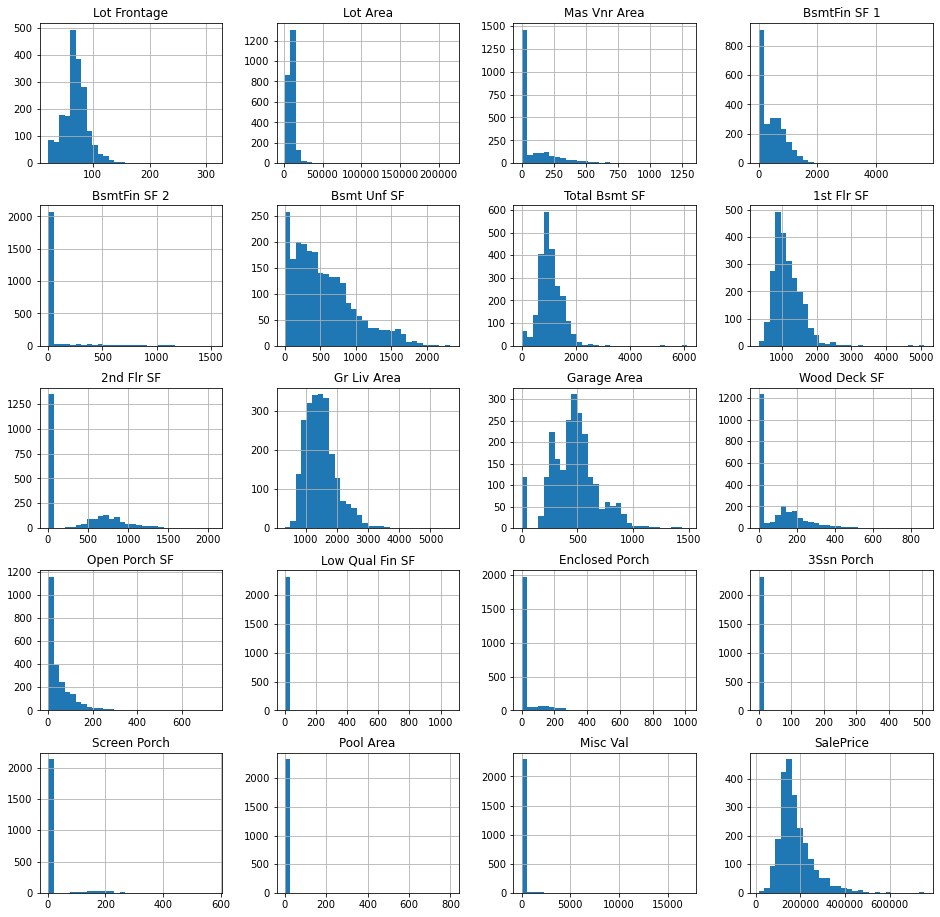

In [2]:
import matplotlib.pyplot as plt

continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
              'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
              'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
              '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
ames[continuous].hist(bins=30, figsize=(16,16))
plt.show()

- The most obvious observation is that the histograms above are all of different data ranges. 
- Most, if not all, of the distributions are skewed to the left

## 3. Visualizing Discrete Columns
There are 14 discrete columns

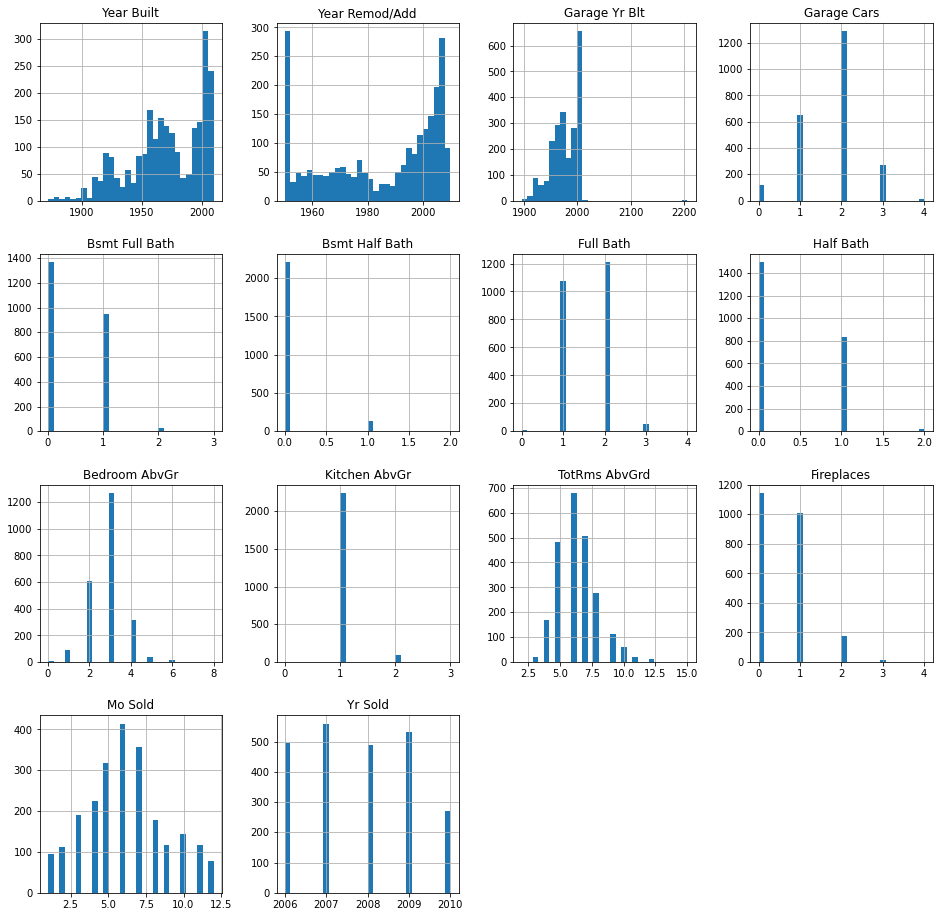

In [3]:
discrete = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath',
           'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
           'TotRms AbvGrd', 'Fireplaces', 'Mo Sold', 'Yr Sold']
ames[discrete].hist(bins=30, figsize=(16,16))
plt.show()

From the distributions above, we can get useful insights about what a typical house in Ames, Iowa looks like and also how the marked behaved over time:
- Most of the houses have at least two car garages
- It's not typical for a house to have a basement bath (full or half)
- Most houses have at least 3 bedrooms above ground
- Nearly all houses have 1 kitchen and none has zero
- There is an almost 50/50 chance that a house is going to have a fireplace
- June is the best month in terms of houses sold, July is second best, and May is third. 
- December is the worst in terms of houses sold, followed by January

There are also a couple issues:
- A garage cannot have been build in 2200 because that's in the future
- We may also want to check out the `Year Remod/Add` and understand why the beginning of the chart looks like that.

## 4. Studying the Correlation with the Target
This task will not be all-inclusive because some of the features have text values and we can't learn anything from them yet. However, after encoding them to numbers, we can come back to this and see whether they add insights to what we have

In [4]:
corr_matrix = ames.corr()
sorted_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
sorted_corr

SalePrice          1.000
Overall Qual       0.795
Gr Liv Area        0.698
Garage Cars        0.644
Garage Area        0.633
Total Bsmt SF      0.612
1st Flr SF         0.607
Year Built         0.545
Full Bath          0.542
Year Remod/Add     0.518
Garage Yr Blt      0.516
Mas Vnr Area       0.491
TotRms AbvGrd      0.475
Fireplaces         0.468
BsmtFin SF 1       0.424
Wood Deck SF       0.333
Lot Frontage       0.329
Open Porch SF      0.298
Bsmt Full Bath     0.287
Half Bath          0.285
2nd Flr SF         0.279
Lot Area           0.261
Bsmt Unf SF        0.164
Bedroom AbvGr      0.149
Screen Porch       0.137
Pool Area          0.079
3Ssn Porch         0.035
Mo Sold            0.031
BsmtFin SF 2       0.027
Low Qual Fin SF   -0.016
Misc Val          -0.018
Bsmt Half Bath    -0.024
Yr Sold           -0.038
MS SubClass       -0.066
Overall Cond      -0.104
Kitchen AbvGr     -0.116
Enclosed Porch    -0.131
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Features')

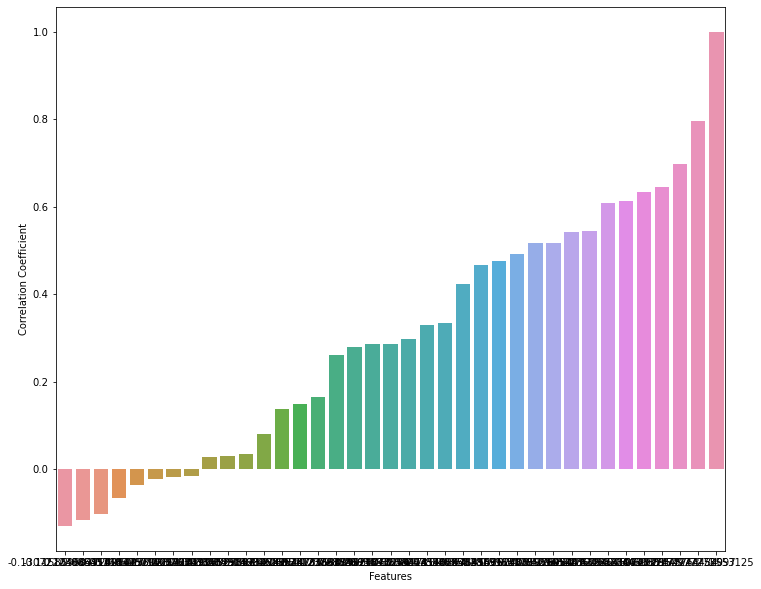

In [5]:
import seaborn as sns

plt.figure(figsize=(12,10))
ax = sns.barplot(x=sorted_corr.index, y=sorted_corr.values, data=sorted_corr)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')

## 5. Correlation Heatmap

<AxesSubplot:>

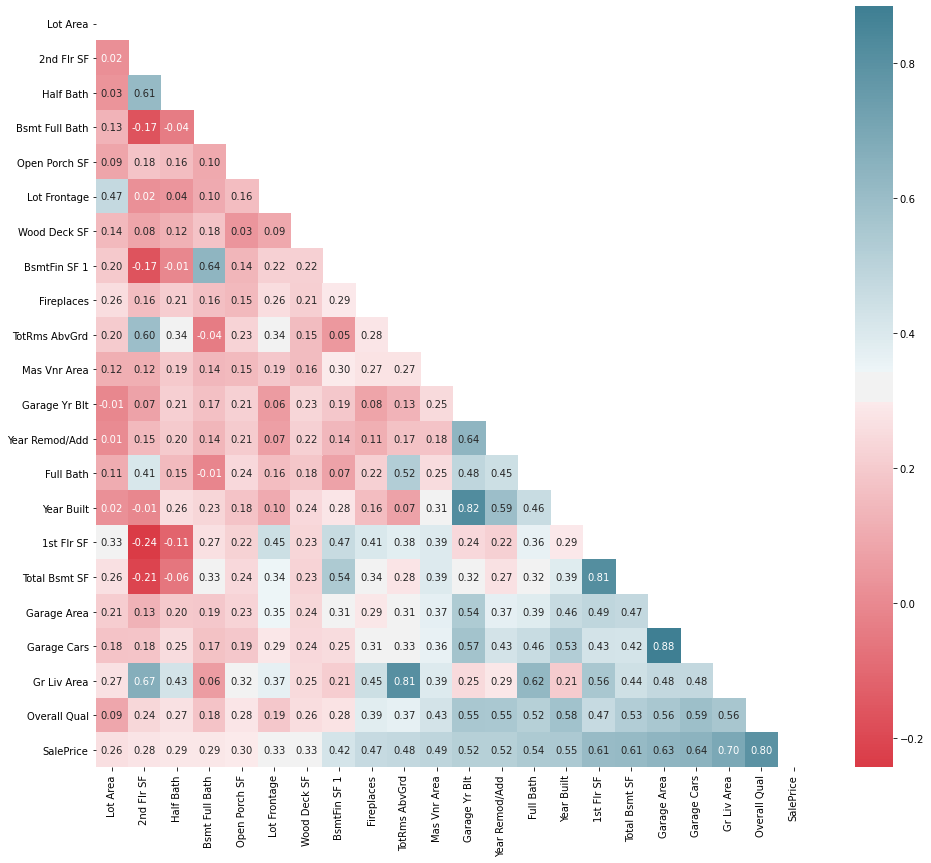

In [6]:
sorted_corr_ = corr_matrix['SalePrice'].sort_values()
strong_corrs = sorted_corr_[sorted_corr_ > 0.2]
corr = ames[strong_corrs.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".2f", annot_kws={"size": 10})